# 2. Working with data

In [1]:
import torch

## A simple example

### Dataset

In [2]:
from torch.utils.data import Dataset

In [3]:
class DummyDataset(Dataset):
    def __init__(self):
        self.data = torch.rand(10)
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        sample = self.data[index]
        label = sample > 0.5
        return (sample, label)

In [6]:
dataset = DummyDataset()
print(dataset)

In [8]:
dataset.data

tensor([0.5555, 0.1095, 0.0651, 0.6357, 0.8122, 0.5782, 0.8606, 0.8770, 0.6892,
        0.8682])

In [9]:
dataset[0]  # It returns a tuple (data example, class label)

(tensor(0.5555), tensor(True))

### Dataloader

In [10]:
from torch.utils.data import DataLoader

In [11]:
loader = DataLoader(dataset, batch_size=5, shuffle=True)

In [12]:
for sample, label in loader:
    print(sample, label)
    break

tensor([0.6357, 0.8770, 0.8682, 0.1095, 0.5555]) tensor([ True,  True,  True, False,  True])


## A real example

### Alien vs Predator Dataset 

In [13]:
!tree -nd ../alien-vs-predator

Too many parameters - ../alien-vs-predator


![predator](../alien-vs-predator/train/predator/10.jpg)
![alien](../alien-vs-predator/train/alien/10.jpg)

In [14]:
from pathlib import Path
from PIL import Image


class AlienPredatorDataset(Dataset):
    def __init__(self, root, split):
        self.root = root
        self.split = split
        
        # Load and save all image paths
        self.img_instances = []
        
        for img_path in Path(root, split, "alien").glob("*.jpg"):
            self.img_instances.append((img_path, 0))
            
        for img_path in Path(root, split, "predator").glob("*.jpg"):
            self.img_instances.append((img_path, 1))
    
    
    def __len__(self):
        return len(self.img_instances)
    
    
    def __getitem__(self, index):
        path, target = self.img_instances[index]
        
        with open(path, 'rb') as f:
            img = Image.open(f).convert('RGB')
            
        return (img, target)

In [15]:
dataset = AlienPredatorDataset("../alien-vs-predator/", "train")

In [16]:
len(dataset)

694

In [17]:
dataset[0]  # Here again it returns a tuple (image, class label)

(<PIL.Image.Image image mode=RGB size=225x225 at 0x1EF9DAA6F28>, 0)

In [18]:
dataset[1]

(<PIL.Image.Image image mode=RGB size=290x174 at 0x1EF9DAA69B0>, 0)

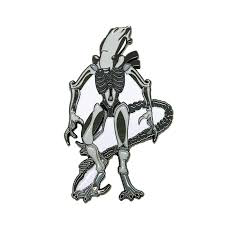

In [19]:
dataset[0][0]

Use transforms to get tensors of similar size

### Torchvision's transforms

The torchvision package consists of popular datasets, model architectures, and common image transformations for computer vision.

In [ ]:
from torchvision.transforms import ToTensor, ToPILImage, RandomCrop

In [ ]:
crop_transform = RandomCrop(100)

In [ ]:
img = dataset[0][0]
img

In [ ]:
crop_transform(img)

In [ ]:
from torchvision.transforms import Compose

In [ ]:
all_transforms = Compose((
    RandomCrop(100),
    ToTensor(),
))

In [ ]:
all_transforms(img)

In [ ]:
all_transforms(img).shape

Let's apply it to our AlienPredatorDataset !

### Dataloader

In [ ]:
loader = DataLoader(dataset, batch_size=5, shuffle=True) # workers

for sample, label in loader:
    print(sample.shape, label)
    break

## Using torchvision ImageFolder

In [ ]:
from torchvision.datasets import ImageFolder

In [ ]:
dataset = ImageFolder(root="../alien-vs-predator/", transform=all_transforms)

In [ ]:
dataset[0]

---
# Building our training loop (2 / 5)

In [20]:
# INITIALIZATION

import torch
from torch.utils.data import DataLoader
from torchvision.transforms import Compose, ToTensor, RandomCrop
from torchvision.datasets import ImageFolder

device = torch.device("cpu")

transform = Compose((RandomCrop((50, 50)), ToTensor()))
dataset = ImageFolder(root="../alien-vs-predator/", transform=transform)
loader = DataLoader(dataset, batch_size=5, shuffle=True, num_workers=5)

In [21]:
# TRAINING LOOP

for samples, labels in loader:
    samples = samples.to(device)
    labels = labels.to(device)
    # compute predictions with model
    # compute the loss
    # compute gradients
    # update model parameters